In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import PlotStyler
from pynamicalsys import ContinuousDynamicalSystem as cds
from pynamicalsys import HamiltonianSystem as HS

In [2]:
time_step = 0.01

In [3]:
E = 1 / 8  # Total energy of the system
x = 0  # Define the initial condition
y = -0.25
py = 0
px = np.sqrt(2 * (E - x**2 * y + y**3 / 3) - x**2 - y**2 - py**2)

dof = 2
q = np.array([x, y])
p = np.array([px, py])

u = np.array([x, y, px, py])

total_time = 10000

In [4]:
ds = cds(model="henon heiles")
ds.integrator("rk4", time_step=time_step)

In [5]:
ldi = []
for k in [2, 3, 4]:
    ldi.append(ds.LDI(u, total_time, k, return_history=True))

In [6]:
gali = []
for k in [2, 3, 4]:
    gali.append(ds.GALI(u, total_time, k, return_history=True))

In [7]:
sali = ds.SALI(u, total_time, return_history=True)

In [8]:
hs = HS(model="henon heiles")
hs.integrator("svy4", time_step=time_step)

In [9]:
symp_ldi = []
for k in [2, 3, 4]:
    symp_ldi.append(hs.LDI(q, p, total_time, k, return_history=True))

In [10]:
symp_gali = []
for k in [2, 3, 4]:
    symp_gali.append(hs.GALI(q, p, total_time, k, return_history=True))

In [12]:
symp_sali = hs.SALI(q, p, total_time, return_history=True)

In [13]:
hs.integrator("vv2", time_step=time_step)

In [14]:
symp_vv2_ldi = []
for k in [2, 3, 4]:
    symp_vv2_ldi.append(hs.LDI(q, p, total_time, k, return_history=True))

In [15]:
symp_vv2_gali = []
for k in [2, 3, 4]:
    symp_vv2_gali.append(hs.GALI(q, p, total_time, k, return_history=True))

In [16]:
symp_vv2_sali = hs.SALI(q, p, total_time, return_history=True)

<Figure size 640x480 with 0 Axes>

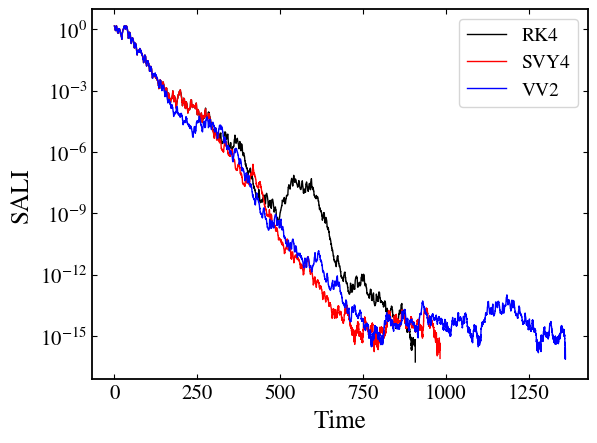

In [17]:
fontsize = 18
ps = PlotStyler(fontsize=fontsize)
ps.apply_style()

fig, ax = plt.subplots()

ax.plot(sali[:, 0], sali[:, 1], "k", label="RK4")
ax.plot(symp_sali[:, 0], symp_sali[:, 1], "r", label="SVY4")
ax.plot(symp_vv2_sali[:, 0], symp_vv2_sali[:, 1], "b", label="VV2")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("SALI")
ax.set_yscale("log")

<Figure size 640x480 with 0 Axes>

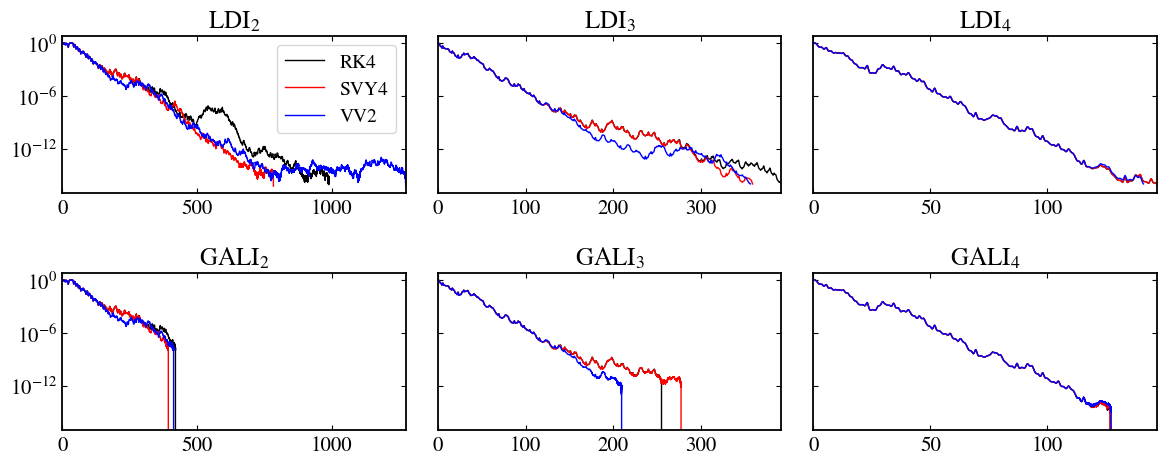

In [26]:
fontsize = 18
ps = PlotStyler(fontsize=fontsize)
ps.apply_style()

fig, ax = plt.subplots(2, 3, sharey=True, figsize=(12, 5))

xmax = [-1, -1, -1]
for i, k in enumerate([2, 3, 4]):
    ax[0, i].plot(ldi[i][:, 0], ldi[i][:, 1], "k", label="RK4")
    ax[0, i].plot(symp_ldi[i][:, 0], symp_ldi[i][:, 1], "r", label="SVY4")
    ax[0, i].plot(symp_vv2_ldi[i][:, 0], symp_vv2_ldi[i][:, 1], "b", label="VV2")
    ax[0, i].set_title(f"LDI$_{k}$", fontsize=fontsize)
    m = max([ldi[i][-1, 0], symp_ldi[i][-1, 0], symp_vv2_ldi[i][-1, 0]])
    if m > xmax[i]:
        xmax[i] = m

    ax[1, i].plot(gali[i][:, 0], gali[i][:, 1], "k", label="RK4")
    ax[1, i].plot(symp_gali[i][:, 0], symp_gali[i][:, 1], "r", label="SVY4")
    ax[1, i].plot(symp_vv2_gali[i][:, 0], symp_vv2_gali[i][:, 1], "b", label="VV2")

    m = max([gali[i][-1, 0], symp_gali[i][-1, 0], symp_vv2_gali[i][-1, 0]])
    if m > xmax[i]:
        xmax[i] = m

    ax[1, i].set_title(f"GALI$_{k}$", fontsize=fontsize)
for i in range(3):
    ax[0, i].set_xlim(0, xmax[i])
    ax[1, i].set_xlim(0, xmax[i])
ax[0, 0].legend()
ax[0, 0].set_yscale("log")
plt.tight_layout()